# CNN (B)uild and (T)rain tutorial on CIFAR10 dataset

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras import backend as keras
from keras.layers import *
from keras.models import Model

from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions

from keras.preprocessing import image
from keras.preprocessing.image import load_img

from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


from keras import backend as K

from CNN_utils import *
from Cifar_utils import *

2024-01-09 12:29:52.525556: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:29:52.611396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 12:29:52.611468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 12:29:52.615634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 12:29:52.632213: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:29:52.633544: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['figure.figsize'] = (8,8) # Make the figures a bit bigger

# Load dataset

In [3]:
#Load data (~160MB)
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [4]:
# Inspect the dataset:
print('Size of training data: '+str(trainX.shape))
print('Labels in training data: '+str(trainY.shape))
print('   ')
print('Size of test data: '+str(testX.shape))
print('Labels in test data: '+str(testY.shape))


Size of training data: (50000, 32, 32, 3)
Labels in training data: (50000, 1)
   
Size of test data: (10000, 32, 32, 3)
Labels in test data: (10000, 1)


In [5]:
# Set-up dataset classes
classes = ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck']

In [6]:
# one-hot encode the training and testing labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

In [7]:
#set-up batch generation and image preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)

# batch generator with data augmentation
#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True)

train_set = train_datagen.flow(
        trainX, trainY,
        batch_size=16)

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow(
        testX, testY,
        batch_size=4)

Let's look at some examples of the training data

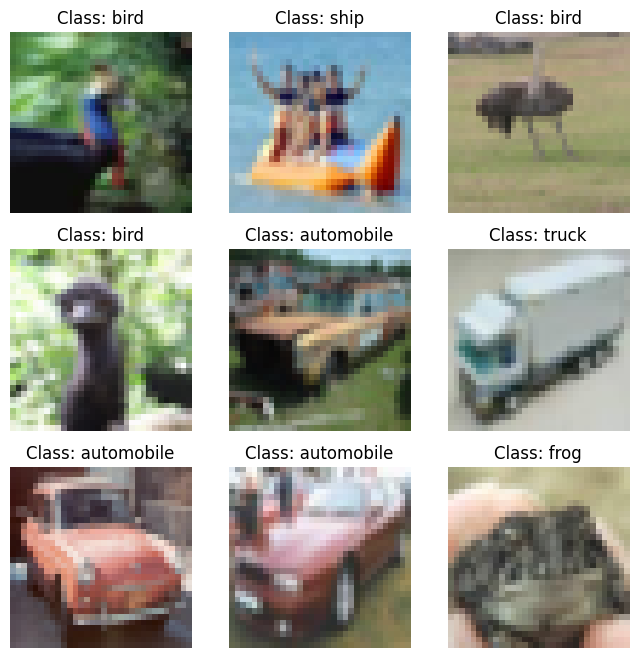

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    my_random = i+np.random.randint(100)
    plt.imshow(trainX[my_random,::], interpolation='none') #, cmap='gray'
    temp_class = np.argmax(trainY[my_random,::])
    plt.title("Class: {}".format(classes[temp_class]))

# CNN

## Building model

In [9]:
input_size = (32,32,3)
#initial layer
inputs = Input(input_size)

# block 1 (filters with size 32)
x = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
x = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# block 2 (filters with size 64)



# block 3 (filters with size 128)




# final block 
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
out = Dense(10, activation='softmax')(x)

model = Model(inputs, out)

In [11]:
# Model preparation
adamopt = Adam(learning_rate=1e-4)
model.compile(optimizer=adamopt, loss='categorical_crossentropy', metrics=['accuracy'])


## Training!

In [12]:
hist = model.fit_generator(
        train_set,
        steps_per_epoch=100,
        epochs=5,
        validation_data=test_set,
        validation_steps=200)

/tmp/ipykernel_67/472991968.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


100/100 [==============================] - 20s 192ms/step - loss: 2.1703 - accuracy: 0.2013 - val_loss: 2.0587 - val_accuracy: 0.2562


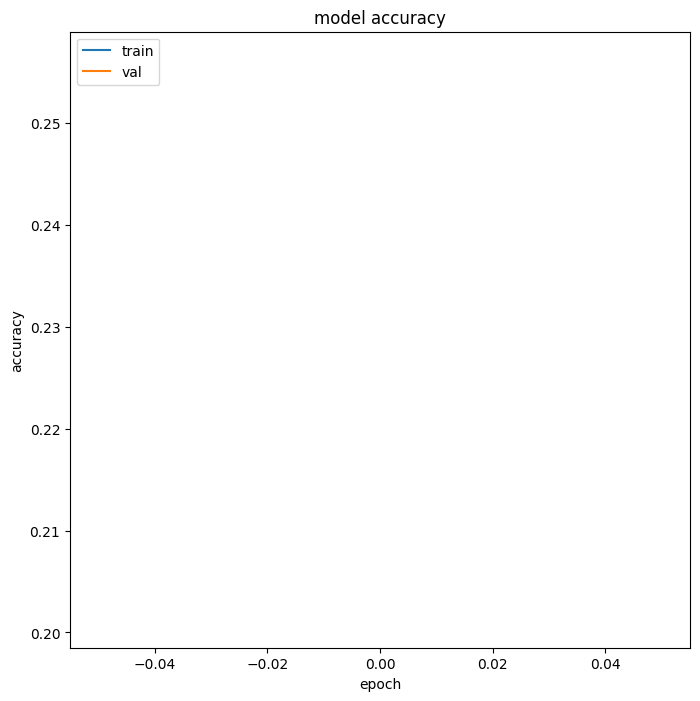

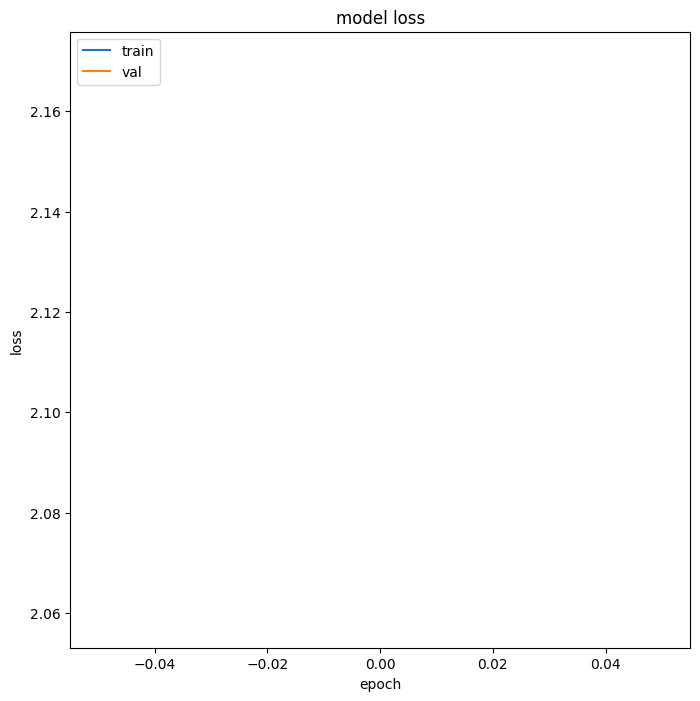

In [13]:
print_learning_acc(hist.history)

In [14]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('Model accuracy -> %.3f' % (acc * 100.0))

313/313 [==============================] - 16s 49ms/step - loss: 114.0236 - accuracy: 0.2665
Model accuracy -> 26.650


## Inference
We set the image from test_set as input to the network and get predictions from the output layer of the network.

Inference results: (prediction/ground_truth)
1/1 [==============================] - 0s 34ms/step


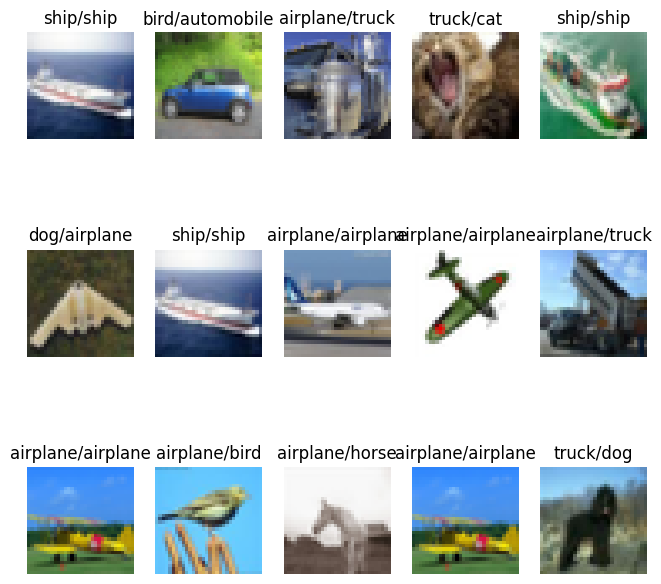

In [17]:
#Inference on random examples
print("Inference results: (prediction/ground_truth)")
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis('off')
    my_random = i+np.random.randint(100)
    im = testX[my_random,::]
    plt.imshow(im, interpolation='none') #, cmap='gray'
    
    x = np.array(im)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)

    temp_class = np.argmax(preds[0])
    
    title_string = classes[temp_class] + "/" + classes[np.argmax(testY[my_random])]
    plt.title(title_string)
    
    #plt.title("Class {}".format(classes[temp_class]))
    

1/1 [==============================] - 0s 25ms/step
Probaility for all classes:
0.000  :  airplane
0.000  :  automobile
0.000  :  bird
1.000  :  cat
0.000  :  deer
0.000  :  dog
0.000  :  frog
0.000  :  horse
0.000  :  ship
0.000  :  truck


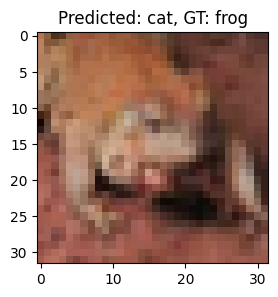

In [20]:
# inference on specified example
idx = 5 #54


im = testX[idx,::]

plt.figure(figsize=(3,3))
plt.imshow(im)

x = np.array(im)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)

temp_class = np.argmax(preds[0])
title_string = "Predicted: "+classes[temp_class] + ", GT: " + classes[np.argmax(testY[idx])]
plt.title(title_string)

print('Probaility for all classes:')
for i in range(10):
    print("%2.3f"% (preds[0][i]),' : ',classes[i])

## Summary
One of the main problems of deep neural networks is 'overfitting'. It leads to poor adaptation of the model to new data and shows as high variance in the train/dev set error comparison. 
 To reduce this problem techniques like regularization, data augmentation, early stopping and dropout could be used. Expansion of the model also tends to lower the overfitting problem but increase the amount of computational resources needed.